In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
# Définition de la classe Ville
class Ville:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [3]:
# Calcul de la distance entre deux villes
def distance(ville1, ville2):
    return math.sqrt((ville1.x - ville2.x)**2 + (ville1.y - ville2.y)**2)

In [4]:
# Calcul de la distance totale d'un parcours
def distance_totale(parours, villes):
    dist = 0
    for i in range(len(parours) - 1):
        dist += distance(villes[parours[i]], villes[parours[i+1]])
    dist += distance(villes[parours[-1]], villes[parours[0]])  # retour à la ville de départ
    return dist

In [5]:
# Génération d'une solution initiale aléatoire
def generer_solution_initiale(nb_villes):
    return random.sample(range(nb_villes), nb_villes)

In [6]:
# Générer des villes aléatoires
np.random.seed(0)
nb_villes = 10
villes = [Ville(np.random.randint(100), np.random.randint(100)) for _ in range(nb_villes)]
solution=generer_solution_initiale(nb_villes=5)
print("la distance totale de chemins parcouru :",distance_totale(solution, villes))
print(distance(villes[0],villes[2]))

la distance totale de chemins parcouru : 298.193158078212
44.41846462902562


In [7]:
generer_solution_initiale(nb_villes=7)

[4, 5, 1, 2, 0, 3, 6]

In [8]:
# Génération d'une solution voisine en échangeant deux villes
def generer_solution_voisine(solution):
    voisine = solution.copy()
    i, j = random.sample(range(len(solution)), 2)
    voisine[i], voisine[j] = voisine[j], voisine[i]
    return voisine

In [9]:
solution=generer_solution_initiale(nb_villes=7)
voisin=generer_solution_voisine(solution)
print("la solution réalisable actuel est ",solution)
print("la solution voisin est ",voisin)
### Afficher les couts de la fonction objective 
print("la distance totale de la solution actuelle est ",distance_totale(solution, villes))
print("la distance totale de la solution voisin est ",distance_totale(voisin, villes))

la solution réalisable actuel est  [4, 3, 5, 1, 0, 2, 6]
la solution voisin est  [4, 3, 2, 1, 0, 5, 6]
la distance totale de la solution actuelle est  356.2938538858132
la distance totale de la solution voisin est  405.3012895480898


In [28]:
# Algorithme de recuit simulé
def recuit_simule(villes, temperature_initiale, taux_refroidissement, nb_iterations):
    solution_actuelle = generer_solution_initiale(len(villes))
    cout_actuel=distance_totale(solution_actuelle, villes)
    List_cout=[]
    List_cout.append(cout_actuel)
    meilleure_solution = solution_actuelle
    meilleur_cout=[] 
    meilleur_cout.append(cout_actuel)
    temperature = temperature_initiale
    cout=[]

    for i in range(nb_iterations):
        nouvelle_solution = generer_solution_voisine(solution_actuelle)
        nouveau_cout = distance_totale(nouvelle_solution, villes)
        delta_cout = nouveau_cout - cout_actuel
        r=random.random()
        print(r)
        print(math.exp(-delta_cout / temperature))
        
        if delta_cout < 0 or r < math.exp(-delta_cout / temperature):
            solution_actuelle = nouvelle_solution
            cout_actuel=nouveau_cout
            List_cout.append(cout_actuel)

        if cout_actuel < meilleur_cout[-1]:
            meilleure_solution = solution_actuelle
            meilleur_cout.append(cout_actuel)

        temperature *= taux_refroidissement

    return meilleure_solution, meilleur_cout, List_cout

In [31]:
# Générer des villes aléatoires
np.random.seed(0)
nb_villes = 10
villes = [Ville(np.random.randint(100), np.random.randint(100)) for _ in range(nb_villes)]
    
# Paramètres de l'algorithme
temperature_initiale = 100
taux_refroidissement = 0.9
nb_iterations = 100

# Appliquer l'algorithme de recuit simulé
meilleure_solution, meilleur_cout, List_cout = recuit_simule(villes, temperature_initiale, taux_refroidissement, nb_iterations)

print("Meilleure solution:", meilleure_solution)
print("Meilleur coût:", meilleur_cout[-1])

0.275635957237381
1.6832009105047085
0.017645169561823826
1.5904238154894954
0.7951994969615078
0.3659951000450652
0.8837993897041965
0.8251264988594915
0.5983176411421859
0.6963137684338198
0.6046400198690897
0.7887491998592385
0.225560025383027
0.1992635649373015
0.004459384061500593
0.5765334580217073
0.6700077726835278
1.6318619749281775
0.6819044234985847
2.865933100001563
0.20384567948550336
0.9848379542323686
0.7675194986051102
0.953507578774858
0.3530912136502672
0.028742106944451774
0.6102263638134796
0.6063600445522989
0.9129480338403041
0.0020990177121069293
0.6143348443485459
0.7115295956792104
0.15558641060905332
28.270955048600506
0.21395987666243887
1.0233977160849
0.15696361475348508
0.002172928064663334
0.7465008249696858
0.006119478346773009
0.21070532406288578
0.26314981807009497
0.31770295912989266
8.562810350306751e-07
0.45153367509669795
4.616632219911445e-07
0.22568743940129898
0.0016110962968501727
0.35799205831014724
1670.148697173482
0.9782336789207616
0.10091

In [32]:
print("la longueur de la liste meilleur court",len(meilleur_cout))
print("la longueur de la liste des couts",len(List_cout))

la longueur de la liste meilleur court 15
la longueur de la liste des couts 21


Text(0, 0.5, 'Valeur de la fonction objective')

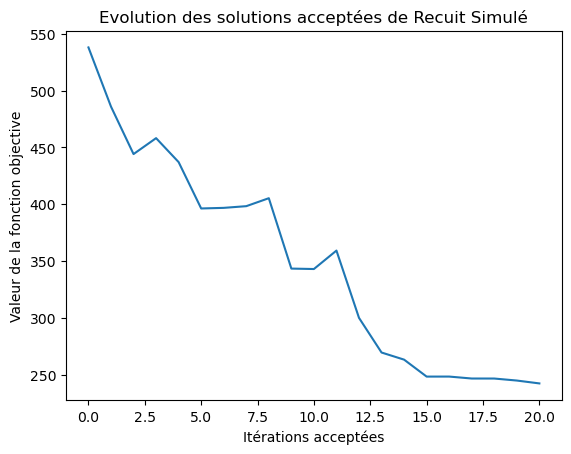

In [33]:
plt.plot(List_cout)
plt.title("Evolution des solutions acceptées de Recuit Simulé")
plt.xlabel("Itérations acceptées")
plt.ylabel("Valeur de la fonction objective")